<h1><center>MENTAL HEALTH IN TECH INDUSTRY🧑‍💻</center></h1>
<img src="mhealth.jpg" height=800px width=800px>

Author : Abhay Mudgal

An Exploratory Data Analysis & Model Development of Mental Health in Tech Industry

---

### 1. AIM & BACKGROUND

Overall the aim of this research is to understand the magnitude of the mental health related issues to identify the areas which are lacking the workspace currently.

Over 1400 responses, the 2016 survey aims to measure attitudes towards mental health in the tech workplace, and examine the frequency of mental health disorders among tech workers.

### 2. DATA SOURCE

This exploratory study uses an open-source dataset published by Open Sourcing Mental Illness, a non-profit corporation dedicated to raising awareness, educating, and providing resources to support mental wellness in the tech and open source communities

The analysis is based on the survey results from 2016 which contains over 1400 responses. This survey was conducted to measure attitudes towards mental health in the tech workplace and examine the frequency of mental health disorders among tech workers. <a href="https://www.kaggle.com/datasets/osmi/mental-health-in-tech-2016">The data can be downloaded from Kaggle.</a>

### 3. LIMITATIONS
This analysis is based on results of the survey conducted by OSMI in 2016 and does not provide enough evidence that this sample population is a fair representation of the entire tech industry. The data may be subject to any inherent biases that the respondents may have. Thus, the analysis is constrained to use the survey questions with adequate responses with limited response values.

### 4. IMPORTING DEPENDENCIES

The following libraries are required to run this notebook successfully.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import squarify

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### 5. DATA QUALITY ASSESSMENT

This section contains preliminary analysis to understand data structure, survey questions, responses and overall quality of the data.

In [2]:
# Read dataset
df = pd.read_csv('..//1-Data//mental-heath-in-tech-2016_20161114.csv')

df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [3]:
# Dataset shape
print("Total number of participants in 2016 : {0}".format(df.shape[0]))

print("Total number of questions in 2016 survey : {0}".format(df.shape[1]))

Total number of participants in 2016 : 1433
Total number of questions in 2016 survey : 63


### 6. EXPLORATORY DATA  ANALYSIS (EDA)

In [4]:
prev_cols = df.columns

prev_cols

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

In [5]:
# Target Variable
df.columns[-16]

'Do you currently have a mental health disorder?'

In [6]:
# Feature in the current dataset needs renaming , it will be easier for us in further analysis
# 1. Renaming Features
renamed_features = ['self_empl_flag', 'comp_no_empl',  'tech_comp_flag', 'tech_role_flag', 'mh_coverage_flag',
                    'mh_coverage_awareness_flag', 'mh_employer_discussion', 'mh_resources_provided', 'mh_anonimity_flag',
                    'mh_medical_leave', 'mh_discussion_neg_impact', 'ph_discussion_neg_impact', 'mh_discussion_cowork', 
                    'mh_discussion_supervisor', 'mh_eq_ph_employer', 'mh_conseq_coworkers', 'mh_coverage_flag2',
                    'mh_online_res_flag', 'mh_diagnosed&reveal_clients_flag', 'mh_diagnosed&reveal_clients_impact', 
                    'mh_diagnosed&reveal_cowork_flag', 'mh_cowork_reveal_neg_impact', 'mh_prod_impact', 'mh_prod_impact_perc',
                    'prev_employers_flag', 'prev_mh_benefits', 'prev_mh_benefits_awareness', 'prev_mh_discussion', 
                    'prev_mh_resources', 'prev_mh_anonimity', 'prev_mh_discuss_neg_conseq', 'prev_ph_discuss_neg_conseq', 
                    'prev_mh_discussion_cowork', 'prev_mh_discussion_supervisor', 'prev_mh_importance_employer', 
                    'prev_mh_conseq_coworkers', 'future_ph_specification', 'why/why_not', 'future_mh_specification',
                    'why/why_not2', 'mh_hurt_on_career', 'mh_neg_view_cowork', 'mh_sharing_friends/fam_flag', 
                    'mh_bad_response_workplace', 'mh_for_others_bad_response_workplace', 'mh_family_hist', 'mh_disorder_past',
                    'mh_disorder_current', 'yes:what_diagnosis?', 'maybe:whats_your_diag', 'mh_diagnos_proffesional',
                    'yes:condition_diagnosed', 'mh_sought_proffes_treatm',  'mh_eff_treat_impact_on_work', 
                    'mh_not_eff_treat_impact_on_work', 'age', 'sex',  'country_live', 'live_us_teritory', 'country_work', 
                    'work_us_teritory',  'work_position','remote_flag']

df.columns = renamed_features
df.head()

,self_empl_flag,comp_no_empl,tech_comp_flag,tech_role_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,...,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,country_live,live_us_teritory,country_work,work_us_teritory,work_position,remote_flag
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [7]:
df.describe()

,self_empl_flag,tech_comp_flag,tech_role_flag,mh_coverage_flag2,prev_employers_flag,mh_sought_proffes_treatm,age
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


*********** Outliers **************

Max age is 323

Min age is 3

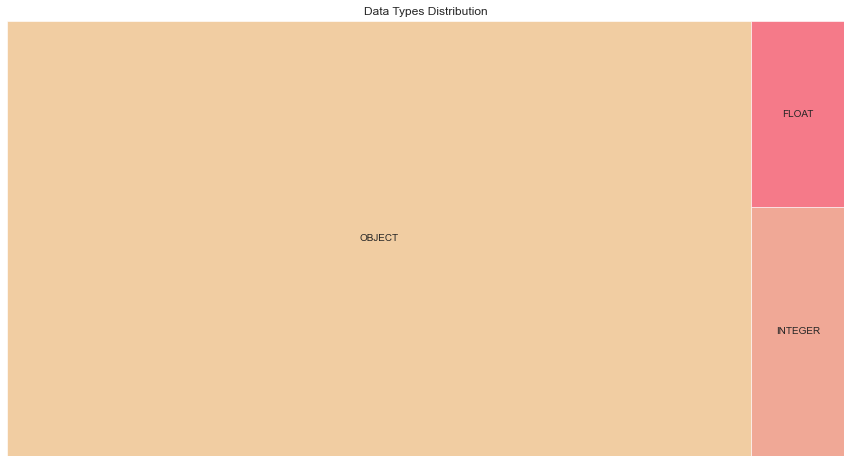

In [8]:
dtype_data = {'Labels' : ['OBJECT', 'INTEGER', 'FLOAT'] , 'Count' : df.dtypes.value_counts()}

dtype_df = pd.DataFrame(dtype_data)

fig = plt.figure(figsize=(15, 8))

colors=['#e8ac65','#e76f51','#ef233c']

sns.set_style(style="whitegrid")

count = dtype_df['Count'].values

label = dtype_df['Labels']

squarify.plot(sizes=count, label=label, alpha=0.6,color=colors).set(title='Data Types Distribution')

plt.axis('off')

plt.show()

As we can observer most of the features have object data type

<AxesSubplot:xlabel='age', ylabel='Density'>

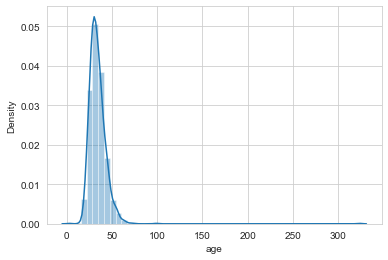

In [9]:
# 2. Removing outliers from 'age'
sns.distplot(df['age'])

In [10]:
median_age = df[(df['age'] >= 18) | (df['age'] <= 75)]['age'].median()

print("Median Age is :", median_age)

df['age'].replace(to_replace = df[(df['age'] < 18) | (df['age'] > 75)]['age'].to_list(), value = median_age, inplace = True)

Median Age is : 33.0


In [11]:
# 3. Encode 'sex' feature
df['sex'].unique()

array(['Male', 'male', 'Male ', 'Female', 'M', 'female', 'm',
       'I identify as female.', 'female ', 'Bigender', 'non-binary',
       'Female assigned at birth ', 'F', 'Woman', 'man', 'fm', 'f',
       'Cis female ', 'Transitioned, M2F', 'Genderfluid (born female)',
       'Other/Transfeminine', 'Female or Multi-Gender Femme', 'Female ',
       'woman', 'female/woman', 'Cis male', 'Male.', 'Androgynous',
       'male 9:1 female, roughly', nan, 'Male (cis)', 'Other',
       'nb masculine', 'Cisgender Female', 'Man', 'Sex is male',
       'none of your business', 'genderqueer', 'cis male', 'Human',
       'Genderfluid', 'Enby', 'Malr', 'genderqueer woman', 'mtf', 'Queer',
       'Agender', 'Dude', 'Fluid',
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'fem', 'Nonbinary', 'male ',
       'human', 'Female (props for making th

In [12]:
# Encoding 'sex' feature
# Man - 0, Female - 1, Other - 2
df['sex'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm', 'man', 'male 9:1 female, roughly','Male (cis)',
                                 'Cis male', 'Male.', 'Man', 'Sex is male', 'cis male', 'Malr', 'Dude',
                                "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
                                 'mail', 'M|', 'Male/genderqueer', 'male ', 'Cis Male', 'Male (trans, FtM)',
                                'cisdude', 'cis man', 'MALE'
                               ], value = 0, inplace = True)

df['sex'].replace(to_replace = ['Female', 'female', 'I identify as female.', 'female ', 
                                'Cis female ', 'Transitioned, M2F', 'Genderfluid (born female)',
                               'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman',
                                'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
                                ' Female', 'Cis-woman', 'female-bodied; no feelings about gender', 'AFAB', 'F', 'f',
                                'Woman', 'fm', 'Female assigned at birth '
                               ], value = 1, inplace = True)

df['sex'].replace(to_replace = ['Bigender', 'non-binary', 'Other/Transfeminine',  'Androgynous', 
                                'Other', 'nb masculine', 'none of your business', 'genderqueer', 'Human', 'Genderfluid',
                                'Enby', 'genderqueer woman', 'mtf', 'Queer','Agender', 'Fluid', 'Nonbinary', 'human',
                                'Unicorn', 'Genderqueer', 'Genderflux demi-girl', 'Transgender woman'
                               ], value = 2, inplace = True)

In [13]:
df['comp_no_empl'].unique()

array(['26-100', '6-25', nan, 'More than 1000', '100-500', '500-1000',
       '1-5'], dtype=object)

In [14]:
df['comp_no_empl'].replace(to_replace = ['More than 1000'], value = '>1000', inplace = True)

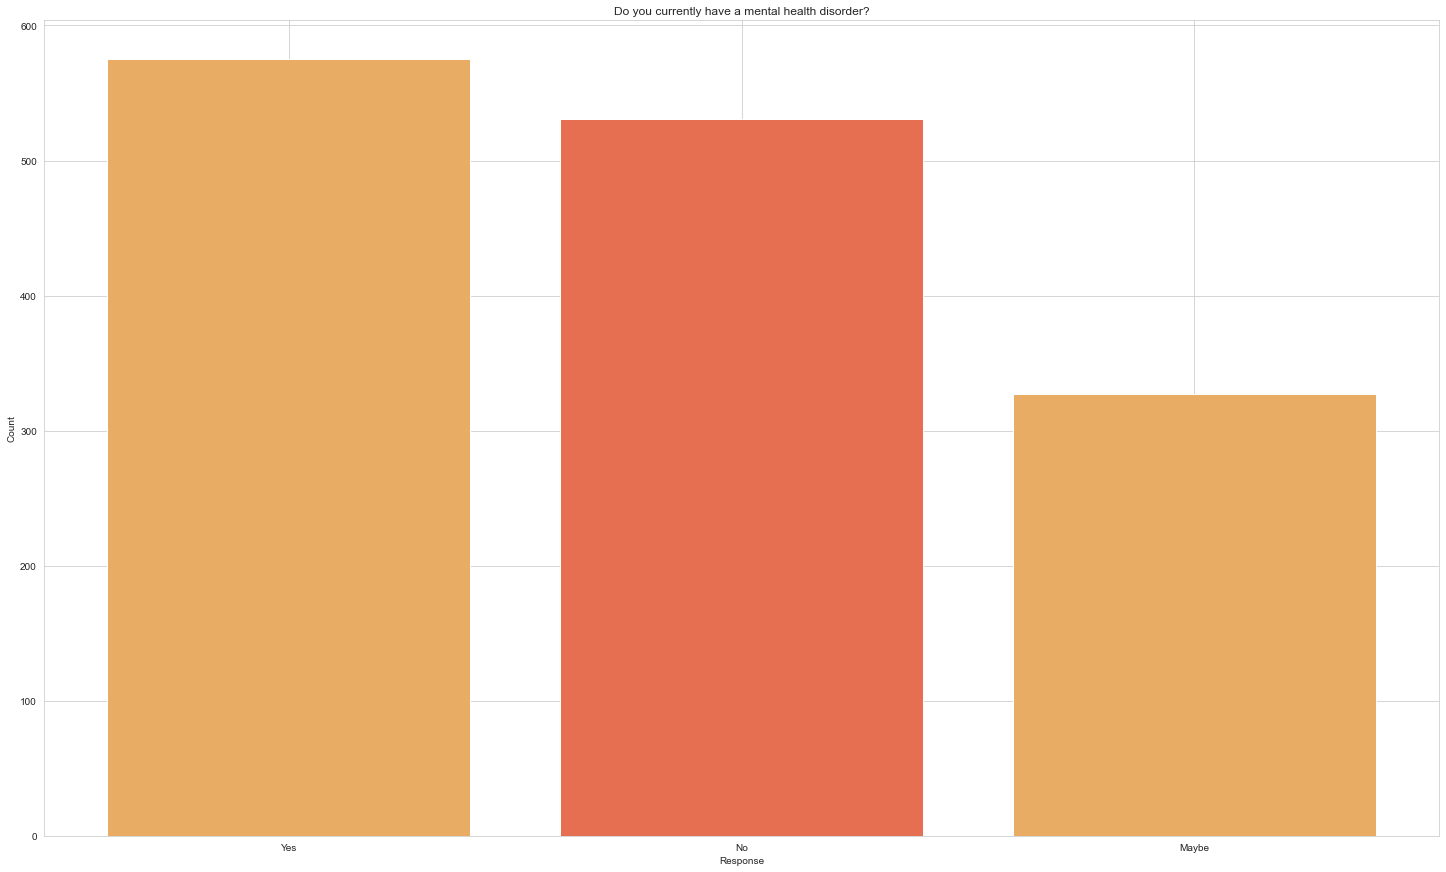

In [15]:
# Target feature count
df['mh_disorder_current'].value_counts()

fig = plt.figure(figsize=(25, 15))
        
plt.bar(sorted(df['mh_disorder_current'].unique(), reverse = True), df['mh_disorder_current'].value_counts()[:], 
        color = colors[:2])
        
plt.title('Do you currently have a mental health disorder?')
        
plt.xlabel("Response")
        
plt.ylabel("Count")
        
plt.show()

In [16]:
# Encoding Target Feature

df['mh_disorder_current'].replace(to_replace=['Yes', 'No', 'Maybe'], value=[1, 0, 2], inplace = True)

#df['mh_disorder_current'] = df['mh_disorder_current'].astype('int64')

pd.to_numeric(df['mh_disorder_current'])

0       0
1       1
2       0
3       1
4       1
       ..
1428    0
1429    0
1430    2
1431    1
1432    1
Name: mh_disorder_current, Length: 1433, dtype: int64

Data Correlation

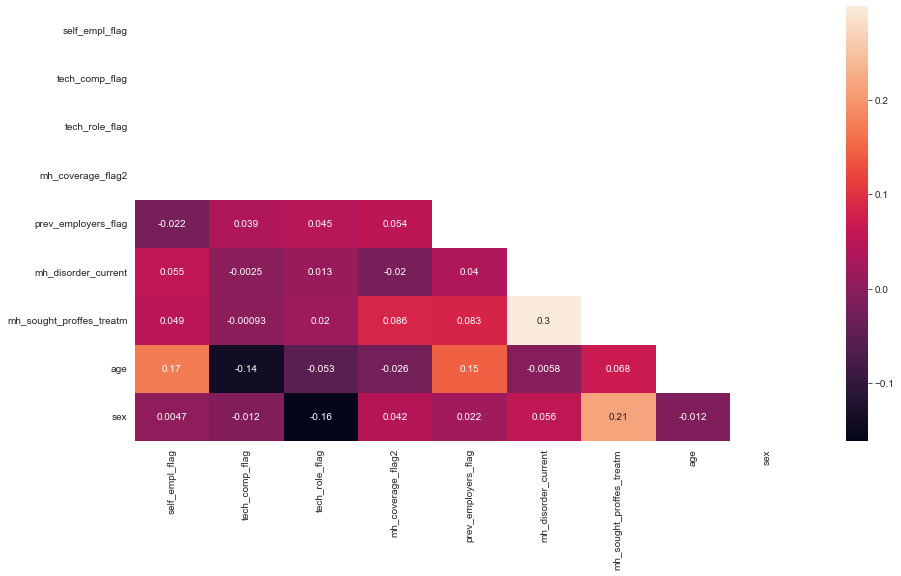

In [17]:
fig = plt.figure(figsize=(15, 8))

train = df 

train = train[[col for col in df if df[col].nunique() > 1]]

corr_ = train.corr()

mask = np.zeros_like(corr_)

mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_, mask = mask, annot = True)

plt.show()

Missing Value Examination

In [18]:
class Missing:
    
    def __init__(self, features_list, features_count):
        
        self.features_list = features_list
        
        self.features_count = features_count
        
        self.color = ['#0A2647', '#144272', '#205295', '#2C74B3', '#8BF5FA', '#3F979B']
        
    def add_labels(self, x, y):
    
        for i in range(len(x)):
        
            plt.text(y[i] + 12, i , y[i], ha = 'center')
    
    def missing_feature(self, typ):
        
        fig = plt.figure(figsize=(25, 15))
        
        plt.barh(self.features_list, self.features_count, color = self.color)
        
        plt.title("{0} Features with missing values in training dataset".format(typ))
        
        plt.xlabel("Features")
        
        plt.ylabel("Missing Count")
        
        #plt.legend(["Nan"], loc="upper right")
        
        self.add_labels(self.features_list, self.features_count)
        

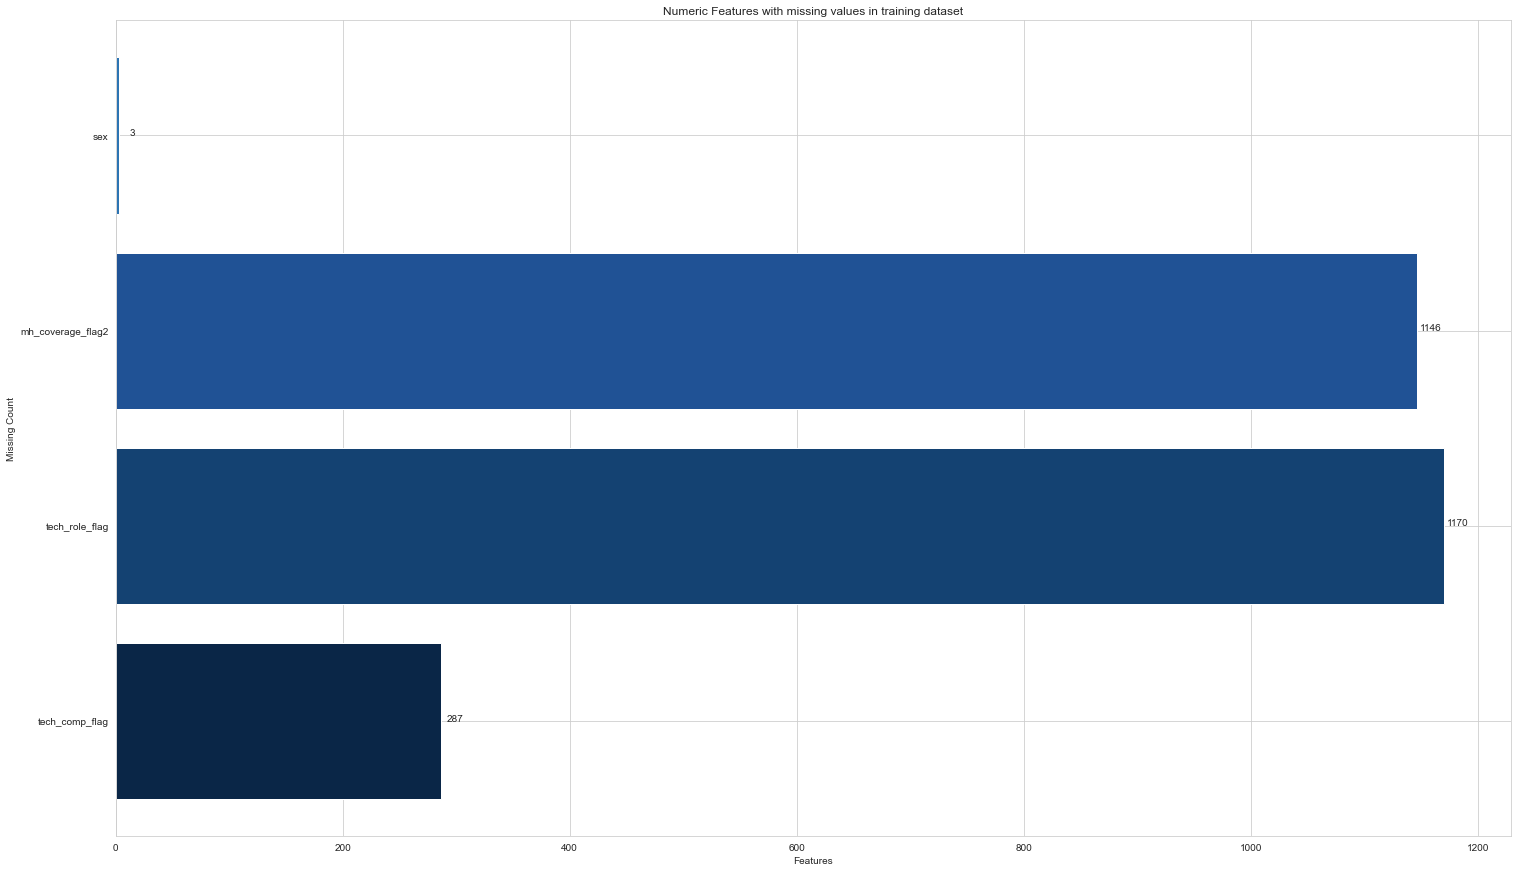

In [19]:
features_list = [col for col in df.columns if df[col].dtype != "object" and df[col].isna().sum() > 0]

features_count = [df[col].isna().sum() for col in df.columns if df[col].isna().sum() > 0 and  df[col].dtype != "object"]

missing = Missing(features_list, features_count)

missing.missing_feature("Numeric")

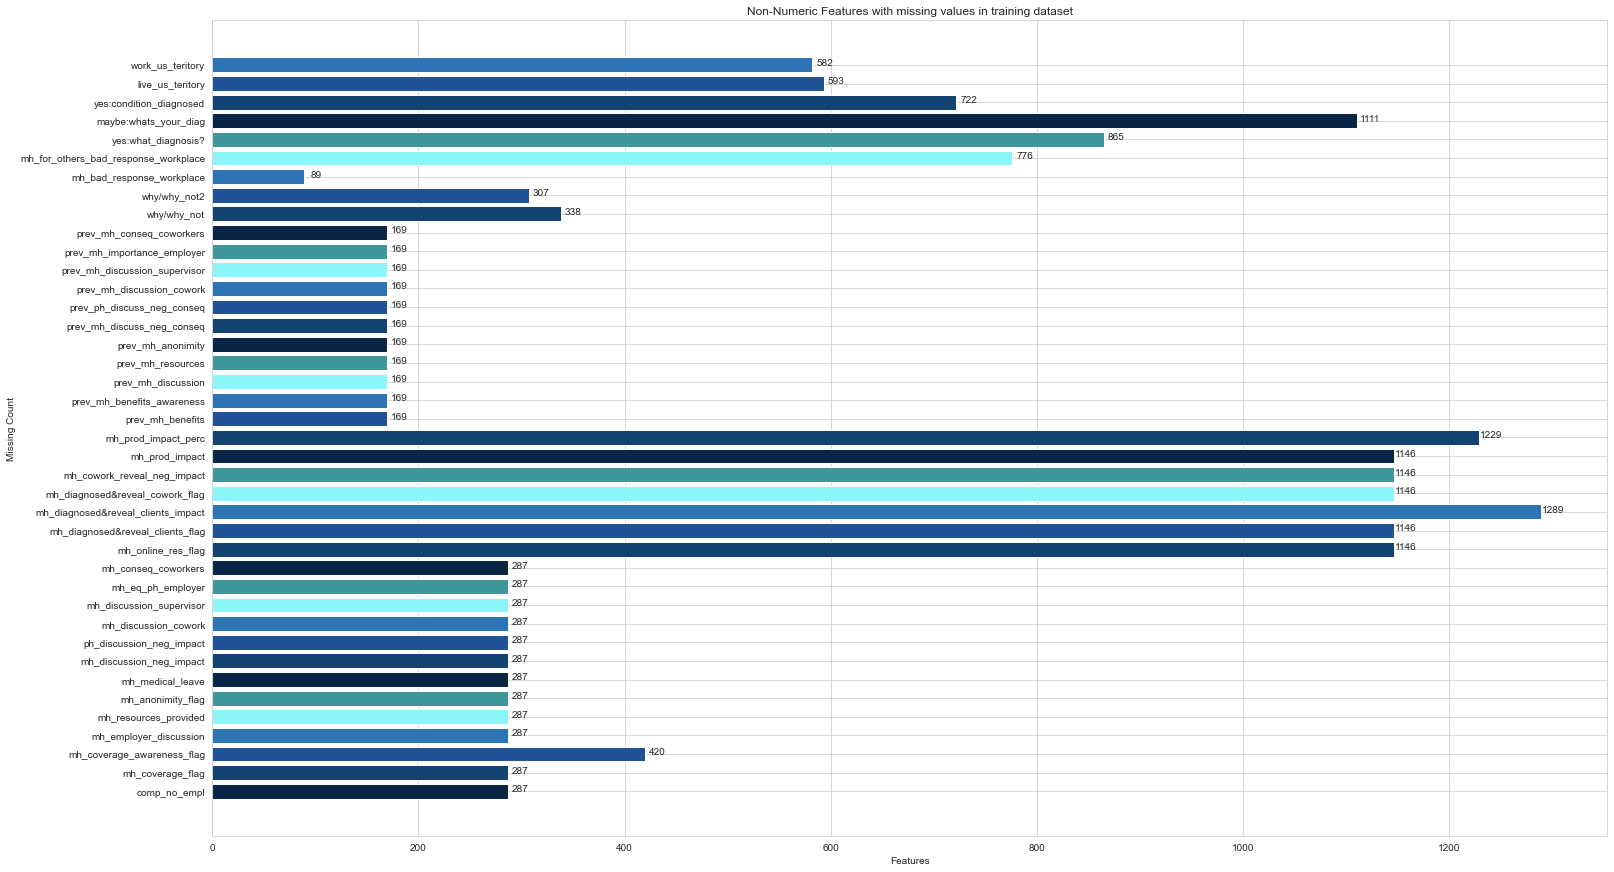

In [20]:
features_list = [col for col in df.columns if df[col].dtype == "object" and df[col].isna().sum() > 0]

features_count = [df[col].isna().sum() for col in df.columns if df[col].isna().sum() > 0 and  df[col].dtype == "object"]

missing = Missing(features_list, features_count)

missing.missing_feature("Non-Numeric")

Too many missing values.... , dropping features with missing value more than 60% (i.e. > 860 samples)

In [21]:
# Dropping Features 
dropped_feat = [col for col in df.columns if df[col].isna().sum() >= 0.60 * df.shape[0]]

#dropped_feat_fif = [col for col in df.columns if df[col].isna().sum() >= 0.50 * df.shape[0]]

#print(set(dropped_feat_fif) - set(dropped_feat))

df.drop(labels = dropped_feat, axis = 1, inplace = True)

print("Number of features dropped : ", len(dropped_feat))

Number of features dropped :  11


In [22]:
from sklearn.impute import SimpleImputer

num_col = ['tech_comp_flag', 'sex']

smpl_num_imp = SimpleImputer(missing_values = np.nan, strategy='most_frequent')

smpl_num_imp.fit(df['tech_comp_flag'].array.reshape(-1, 1))

smpl_num_imp.fit(df['sex'].array.reshape(-1, 1))

df['tech_comp_flag'] = smpl_num_imp.transform(df['tech_comp_flag'].array.reshape(-1, 1))

df['sex'] = smpl_num_imp.transform(df['sex'].array.reshape(-1, 1))

In [23]:
# Compute remaining missing values using <<<<<<<<<< Simple Imputer >>>>>>>>>

smpl_imp = SimpleImputer(missing_values = np.nan, strategy='most_frequent')

smpl_imp.fit(df)

df = pd.DataFrame(data = smpl_imp.transform(df), columns = df.columns).astype(df.dtypes.to_dict())

In [24]:
# Keeping only countries with response > 20

countries = [country for country, value in df['country_live'].value_counts().items()
             if value > 20]

df = df[df['country_live'].isin(countries)]

df.shape

(1239, 52)

## 2. Insights & Visualization

In [25]:
df_mh_disorder = df.loc[df['mh_disorder_current'] == 1]

df_mh_disorder.shape

(528, 52)

In [26]:
class Pie:
    
    def __init__(self, feat1, feat2):
        
        self.startangle = 90
        
        self.shadow = True
        
        self.autopct = '%1.1f%%'
        
        self.feature1 = feat1
        
        self.feature2 = feat2
        
    def distribution_visual(self, label1, label2, title):
        
        plt.figure(figsize=(50,50))
        
        fig, (ax1, ax2) =  plt.subplots(1, 2)

        ax1.pie(df_mh_disorder[self.feature1].value_counts(), labels = label1, startangle=self.startangle, 
                 shadow = self.shadow, autopct=self.autopct)
        
        ax1.set_title(title[0], fontsize = 20)
        
        ax2.pie(df_mh_disorder[self.feature2].value_counts(), labels = label2,  startangle=self.startangle, 
                shadow = self.shadow, autopct=self.autopct)
        
        ax2.set_title(title[1], fontsize = 20)
        
        plt.gcf().set_size_inches(25, 25)
        
        plt.show()
        
class CountPlot(Pie):
    
    def __init__(self, feat1, feat2):
        
        super().__init__(feat1, feat2)
        
    def distribution_visual(self, h, plt_title):
        
        plt.figure(figsize=(50,30))
        
        fig, (ax1, ax2) =  plt.subplots(1, 2)

        sns.countplot(y=df_mh_disorder[self.feature1], hue = df_mh_disorder[h], 
                      ax = ax1)
        
        ax1.set_title(plt_title[0], fontsize = 20)
        
        sns.countplot(y=df_mh_disorder[self.feature2], hue = df_mh_disorder[h],
                      ax = ax2)
        
        ax2.set_title(plt_title[1], fontsize = 20)
        
        plt.gcf().set_size_inches(20, 20)
        
        plt.show()

<Figure size 3600x3600 with 0 Axes>

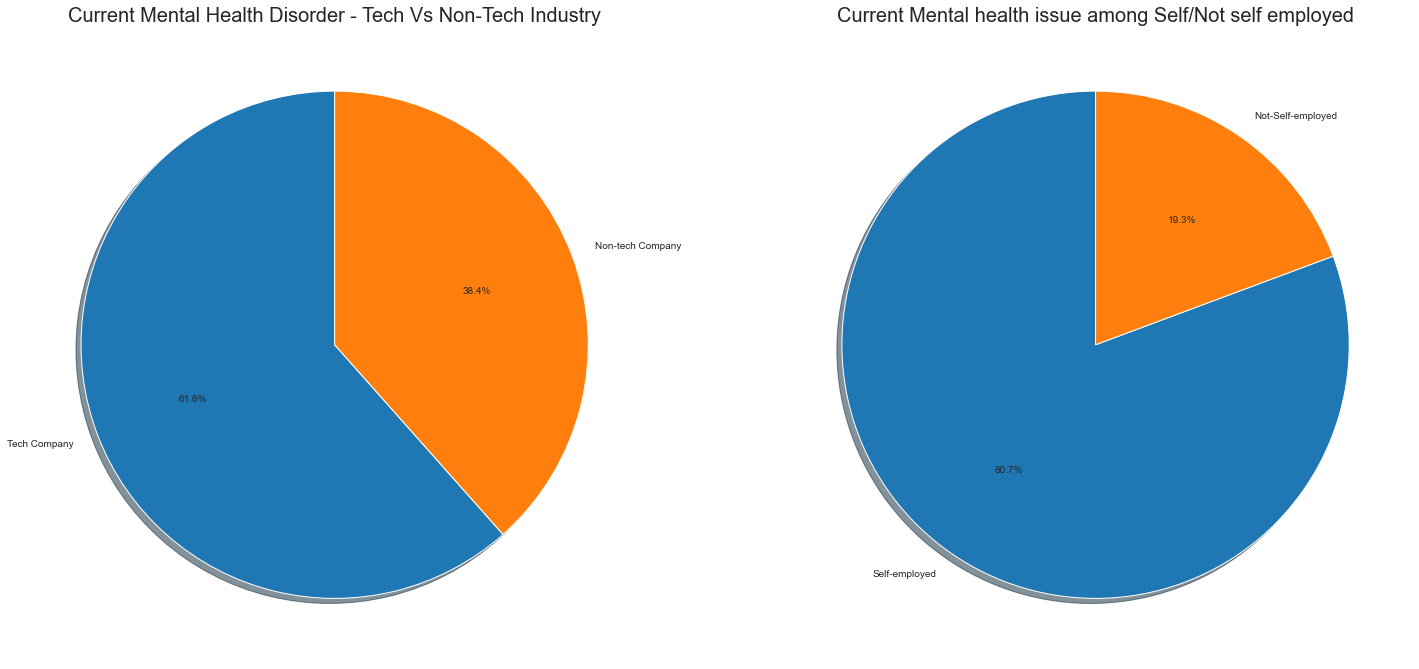

In [27]:
pie = Pie('tech_comp_flag', 'self_empl_flag')

title = ["Current Mental Health Disorder - Tech Vs Non-Tech Industry", 
         "Current Mental health issue among Self/Not self employed"]

tech_comp_labels = ['Tech Company', 'Non-tech Company']

self_emp_labels = ['Self-employed', 'Not-Self-employed']

pie.distribution_visual(tech_comp_labels, self_emp_labels, title)

<Figure size 3600x3600 with 0 Axes>

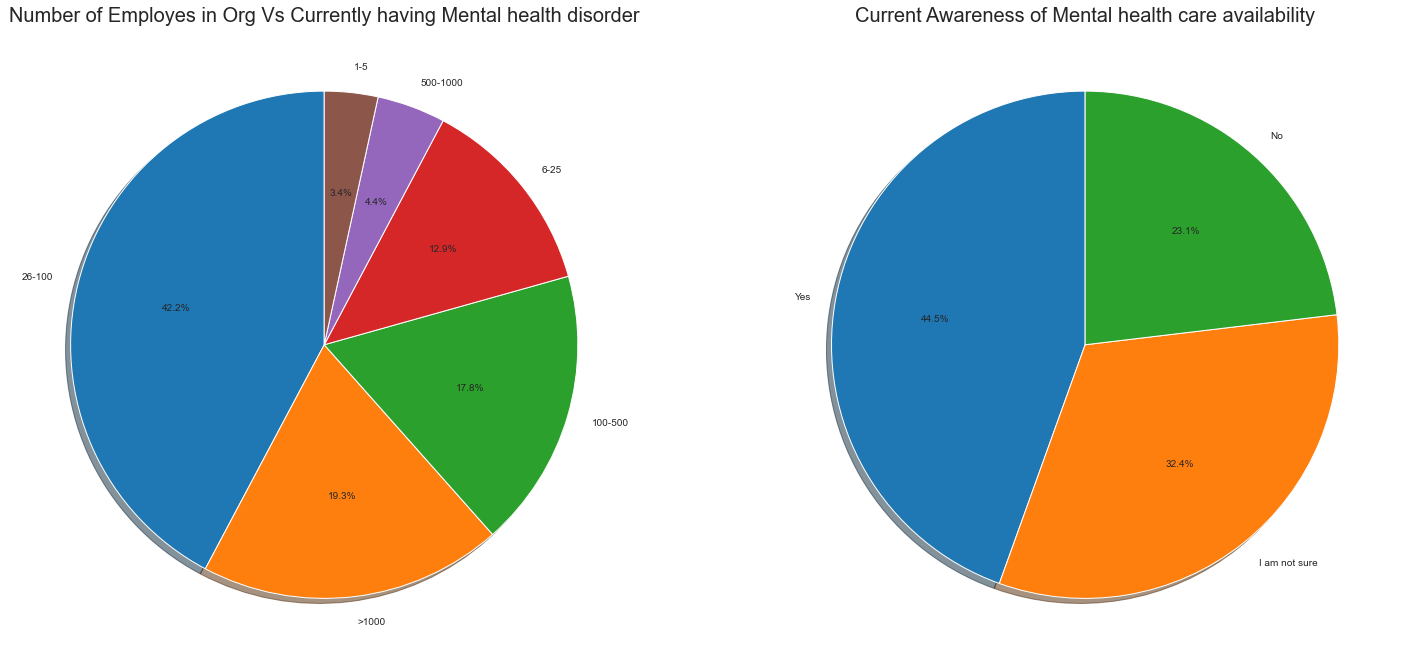

In [28]:
pie = Pie('comp_no_empl', 'mh_coverage_awareness_flag')

comp_no_empl_labels = ['26-100', '>1000', '100-500', '6-25', '500-1000', '1-5']

awareness_labels = ['Yes', 'I am not sure', 'No']

title = ["Number of Employes in Org Vs Currently having Mental health disorder", 
         "Current Awareness of Mental health care availability"]

pie.distribution_visual(comp_no_empl_labels, awareness_labels, title)

<Figure size 3600x2160 with 0 Axes>

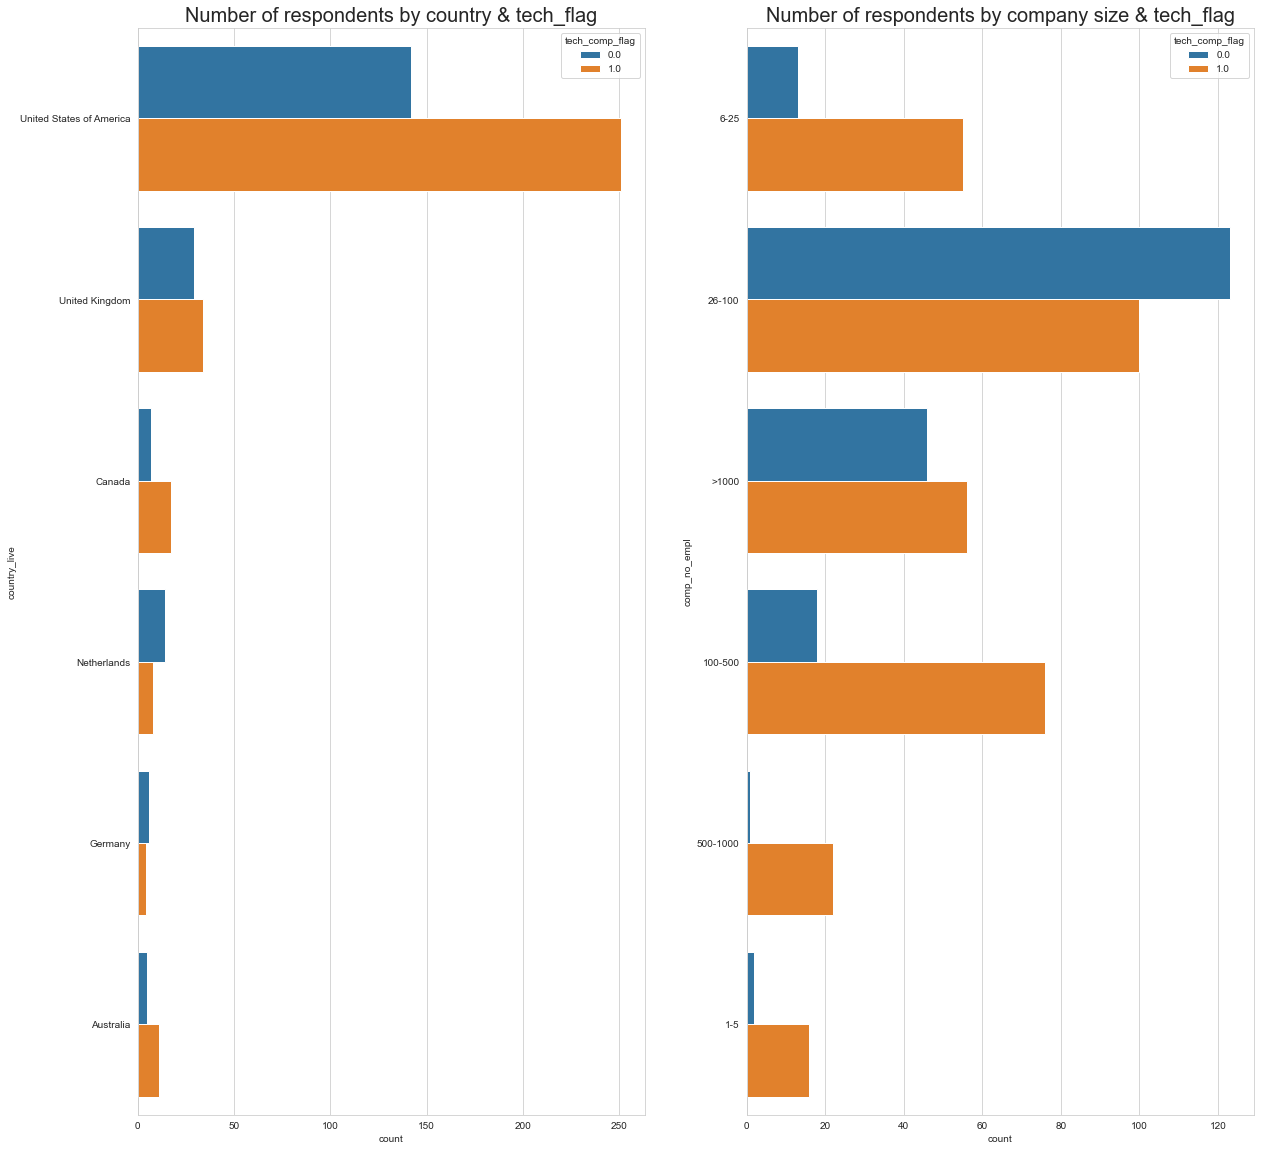

In [29]:
cplot = CountPlot('country_live', 'comp_no_empl')

plt_title = ["Number of respondents by country & tech_flag", 
         "Number of respondents by company size & tech_flag"]

#country_live = countries

#tech_comp_labels = ['Tech Company', 'Non-tech Company']

cplot.distribution_visual('tech_comp_flag', plt_title)

## 3. Machine Learning - Making Predictions

In [30]:
# Imports
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier, XGBRFClassifier

from sklearn.metrics import accuracy_score
from sklearn import preprocessing 

In [31]:
df_model = df.copy()

num_col = [col for col in df_model.columns if df_model[col].dtype in ['int64', 'float64']]

print(num_col)

df_model = df_model[num_col]

cols = [col for col in df_model.columns if col not in ['mh_disorder_current']]

X = df_model[cols]

# Target Variable
Y = df['mh_disorder_current']

# Dataset Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

['self_empl_flag', 'tech_comp_flag', 'prev_employers_flag', 'mh_disorder_current', 'mh_sought_proffes_treatm', 'age', 'sex']


In [32]:
Y_test.head()

465    0
291    2
375    0
700    1
115    0
Name: mh_disorder_current, dtype: int64

In [33]:
def model_train_and_pred(model, model_name=None):
    
    model.fit(X_train, Y_train)
    
    predictions = model.predict(X_test)
    
    print("********** {0} **********".format(model_name))
    
    print("Accuracy Score : ", round(accuracy_score(Y_test, predictions), 5))
    
    print("*************************\n")

In [34]:
# Naive Bayes
nb = GaussianNB()

model_train_and_pred(nb, 'Naive Bayes')

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='multinomial')

model_train_and_pred(lg, 'Logistic Regression')

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")

model_train_and_pred(svm, 'SVM')

# Decision Trees
dtree = DecisionTreeClassifier()

model_train_and_pred(dtree, 'Decission Trees')

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, 
                                 random_state=0)

model_train_and_pred(rforest, 'Random Forest')

# Gradient Boosting
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)

model_train_and_pred(xgb, 'XGB')

# Cross Gradient Booster 
xgbrf = XGBRFClassifier(objective= 'multi:softmax', eval_metric = 'mlogloss')

model_train_and_pred(xgbrf, 'XGBoost RF')

********** Naive Bayes **********
Accuracy Score :  0.62366
*************************

********** Logistic Regression **********
Accuracy Score :  0.62366
*************************

********** SVM **********
Accuracy Score :  0.39785
*************************

********** Decission Trees **********
Accuracy Score :  0.53763
*************************

********** Random Forest **********
Accuracy Score :  0.57796
*************************

[23:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
********** XGB **********
Accuracy Score :  0.56989
*************************

********** XGBoost RF **********
Accuracy Score :  0.62097
*************************



In [35]:
# Parameter Tunning for Cross Gradient Booster 
from sklearn.model_selection import GridSearchCV

In [36]:
def gridSearch(parameter):
    
    gridsearch =  GridSearchCV(
                    estimator = xgbrf, 
                                param_grid = parameter, cv=5)
    
    gridsearch.fit(X_train, Y_train)
    
    print("Best Params : ", gridsearch.best_params_)
    
    predictions = gridsearch.predict(X_test)
    
    print("Test Accuracy : ", round(accuracy_score(Y_test, predictions), 5))
    
    pd.DataFrame(predictions, columns=['predictions']).to_csv('..//3-Output//prediction.csv')

In [37]:
testing_parameter = {
    'min_child_weight':[1, 2, 3, 4],
    'gamma':[i/10.0 for i in range(0,5)],
    'learning_rate':[1e-5, 1e-2, 0.1, 1, 100],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}

gridSearch(testing_parameter)

Best Params :  {'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 1e-05, 'min_child_weight': 3, 'subsample': 0.6}
Test Accuracy :  0.62366


#### Conclusion

Now a days the openess of companies and people in general to mental health in tech is a bit stronger, but there is still lots of loop holes however there is always a way for improvement. Mostly our mental health affects How we think , behave or act.

However now companies starting to pay much more attention on such issues as well.

If you liked this, please upvote!

Thanks!